This notebooks aims to demonstrate some functionality of the python package <https://github.com/cknoll/semantictools>.

In [1]:
import time

print(time.ctime())
%load_ext nb_black
%load_ext ipydex.displaytools

Thu Nov  4 14:55:38 2021


<IPython.core.display.Javascript object>

In [2]:
from IPython.display import SVG, display, HTML

from semantictools import core as smt
import nxv
import importlib

# for easier co-development of library and notebook
importlib.reload(smt)

<module 'semantictools.core' from '/media/workcard/workstickdir/RST/expertise_system/semantictools/src/semantictools/core.py'>

<IPython.core.display.Javascript object>

In [3]:
len(smt.cache.wikidata_query_cache)

0

<IPython.core.display.Javascript object>

In [5]:
# basic query

smt.get_superclasses("Q1426191")[0].source_data

{'item': {'type': 'uri', 'value': 'http://www.wikidata.org/entity/Q7827200'},
 'itemLabel': {'xml:lang': 'en',
  'type': 'literal',
  'value': 'torsion-free module'}}

<IPython.core.display.Javascript object>

In [10]:
base_node = smt.Node(smt.WDObject({"item": {"value": "Q125977"}, "itemLabel": {"value":"vector space"}}))


G = smt.build_graph(base_node, n=3)
G.number_of_nodes() ##:

(G.number_of_nodes()) := 13

---

<IPython.core.display.Javascript object>

In [11]:
style = nxv.Style(
    graph={"rankdir": "TB"},
    node=lambda u, d: {
        "shape": "circle" if not u.is_top_level else "square",
        "fixedsize": True,
        "width": 1,
        "fontsize": 10,
    },
    edge=lambda u, v, d: {"style": "solid", "arrowType": "normal", "label": "is a"},
)

svg_data = nxv.render(G, style, format="svg")

<IPython.core.display.Javascript object>

In [12]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

// necessary to prevent auto scrolling for a long image

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

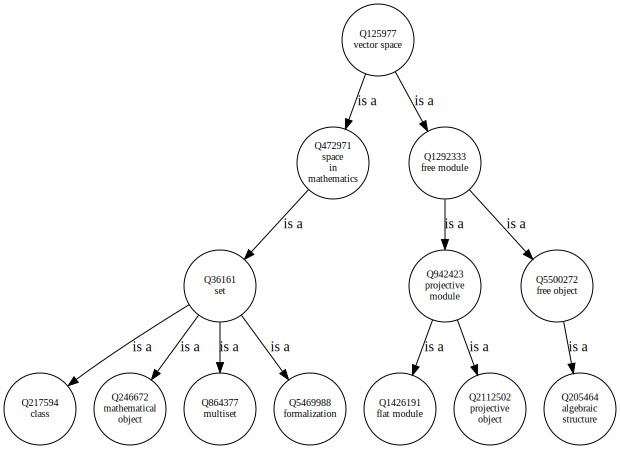

<IPython.core.display.Javascript object>

In [13]:
entity_links = dict(
    [
        (
            node.id,
            '<a href="http://www.wikidata.org/entity/{0}">{0}</a>'.format(node.id),
        )
        for node in G.nodes.keys()
    ]
)

# insert links to wiki data urls
svg_data = svg_data.decode("utf8").format(**entity_links).encode("utf8")

svg_fname = "vectorspace_superclasses_l3.svg"

with open(svg_fname, "wb") as svgfile:
    svgfile.write(svg_data)

display(SVG(svg_data))

In [14]:
display(HTML(f"<a href='{svg_fname}'>{svg_fname}</a>"))

<IPython.core.display.Javascript object>

In [15]:
%time G = smt.build_graph(base_node, n=13)
G.number_of_nodes() ##:

CPU times: user 1.96 s, sys: 56.8 ms, total: 2.01 s
Wall time: 13.6 s


(G.number_of_nodes()) := 70

---

<IPython.core.display.Javascript object>

In [16]:
svg_data = nxv.render(G, style, format="svg")

<IPython.core.display.Javascript object>

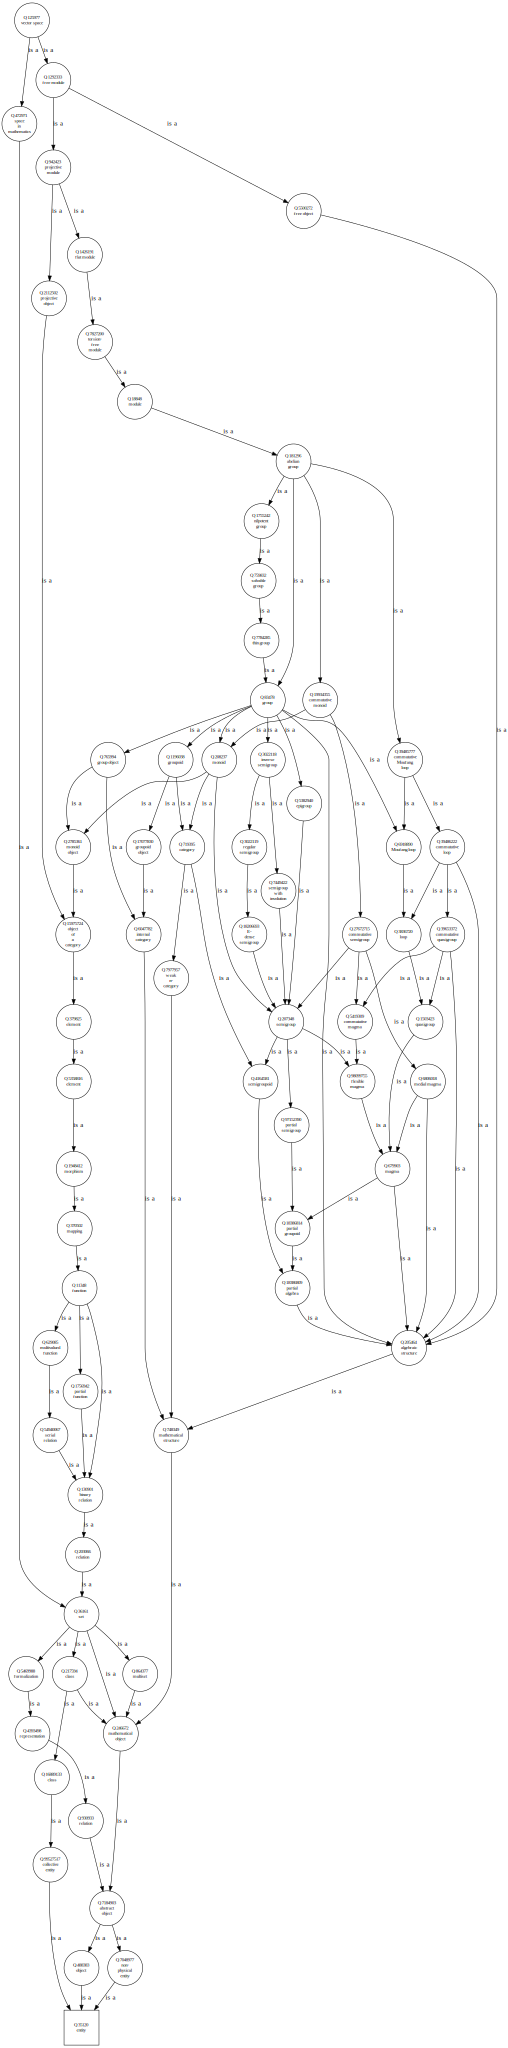

<IPython.core.display.Javascript object>

In [17]:
entity_links = dict(
    [
        (
            node.id,
            '<a href="http://www.wikidata.org/entity/{0}">{0}</a>'.format(node.id),
        )
        for node in G.nodes.keys()
    ]
)

# insert links to wiki data urls
svg_data = svg_data.decode("utf8").format(**entity_links).encode("utf8")

svg_fname = "vectorspace_superclasses_l13.svg"

with open(svg_fname, "wb") as svgfile:
    svgfile.write(svg_data)

display(SVG(svg_data))

In [18]:
display(HTML(f"<a href='{svg_fname}'>{svg_fname}</a>"))

<IPython.core.display.Javascript object>

Save the wikidata query results to prevent unnecessary requests

In [19]:
smt.cache.save_wdq_cache()

print(smt.cache.wdq_cache_path)

/tmp/tmpi3c78d21_semantictools_wdq_cache.pcl


<IPython.core.display.Javascript object>